In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"D:\Excel\googleplaystore.csv\googleplaystore.csv")
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [19]:
# Basic Info
# ----------------------------
print("Dataset Shape:", df.shape)
print(df.info())
print(df.head())

# ----------------------------
# Data Cleaning
# ----------------------------

# Remove duplicates
df = df.drop_duplicates()

# Fix SettingWithCopyWarning using .loc
df.loc[:, 'Rating'] = df['Rating'].fillna(df['Rating'].mean())
df.loc[:, 'Type'] = df['Type'].fillna(df['Type'].mode()[0])
df.loc[:, 'Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])
df.loc[:, 'Current Ver'] = df['Current Ver'].fillna("Varies with device")
df.loc[:, 'Android Ver'] = df['Android Ver'].fillna("Varies with device")
df.loc[:, 'Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean Installs column (remove non-numeric rows)
df = df[~df['Installs'].str.contains('Free|Varies', na=False)]
df.loc[:, 'Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert Size to numeric (MB)
def size_to_mb(size):
    if isinstance(size, str):
        if size.endswith('k'):
            return float(size.replace('k', '')) / 1024
        elif size.endswith('M'):
            return float(size.replace('M', ''))
    return np.nan

df.loc[:, 'Size'] = df['Size'].replace('Varies with device', np.nan)
df.loc[:, 'Size'] = df['Size'].map(size_to_mb)
df.loc[:, 'Size'] = df['Size'].fillna(df['Size'].mean())

# Convert Price to float
df.loc[:, 'Price'] = df['Price'].str.replace('$', '').astype(float)


Dataset Shape: (10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBoo

C:\Users\shrey\AppData\Local\Temp\ipykernel_16732\1275577332.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Size'] = df['Size'].fillna(df['Size'].mean())


In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
# Average rating per category
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(category_rating )
print(content_installs)
# Total installs per content rating
content_installs = df.groupby('Content Rating')['Installs'].sum()

Category
EDUCATION              4.374535
EVENTS                 4.362520
ART_AND_DESIGN         4.350287
BOOKS_AND_REFERENCE    4.311068
PERSONALIZATION        4.304856
PARENTING              4.281590
GAME                   4.277438
BEAUTY                 4.260094
HEALTH_AND_FITNESS     4.251111
SOCIAL                 4.246513
SHOPPING               4.245401
WEATHER                4.239351
SPORTS                 4.218576
PRODUCTIVITY           4.199599
FAMILY                 4.190966
AUTO_AND_VEHICLES      4.190288
MEDICAL                4.184293
PHOTOGRAPHY            4.183266
LIBRARIES_AND_DEMO     4.181069
HOUSE_AND_HOME         4.168431
FOOD_AND_DRINK         4.167837
COMMUNICATION          4.157604
COMICS                 4.156318
NEWS_AND_MAGAZINES     4.140065
ENTERTAINMENT          4.136036
FINANCE                4.134862
BUSINESS               4.134562
LIFESTYLE              4.113107
TRAVEL_AND_LOCAL       4.107027
VIDEO_PLAYERS          4.074532
TOOLS                  4.065789

In [28]:
avg_rating = np.mean(df['Rating'])
print("Average App Rating:", avg_rating)


Average App Rating: 4.188112341722555


In [29]:
total_reviews = np.sum(df['Reviews'])
print("Total Reviews:", total_reviews)


Total Reviews: 4203954052.0


In [30]:
popular_category = df['Category'].value_counts().idxmax()
print("Most Popular Category:", popular_category)


Most Popular Category: FAMILY


In [31]:
free_apps = np.sum(df['Type'] == "Free")
paid_apps = np.sum(df['Type'] == "Paid")
print("Free Apps:", free_apps, " | Paid Apps:", paid_apps)


Free Apps: 9592  | Paid Apps: 765


In [32]:
top10_apps = df.sort_values(by="Installs", ascending=False).head(10)[['App','Installs']]
print(top10_apps)


                               App    Installs
341                       Hangouts  1000000000
3928                       YouTube  1000000000
451                          Gmail  1000000000
3996  Google Chrome: Fast & Secure  1000000000
1700                Subway Surfers  1000000000
3454                  Google Drive  1000000000
2808                 Google Photos  1000000000
865              Google Play Games  1000000000
2853                 Google Photos  1000000000
411   Google Chrome: Fast & Secure  1000000000


In [33]:
correlation = df[['Rating','Reviews','Installs','Price']].corr()
print(correlation)


            Rating   Reviews  Installs     Price
Rating    1.000000  0.068530  0.050669 -0.020587
Reviews   0.068530  1.000000  0.634997 -0.009417
Installs  0.050669  0.634997  1.000000 -0.011147
Price    -0.020587 -0.009417 -0.011147  1.000000


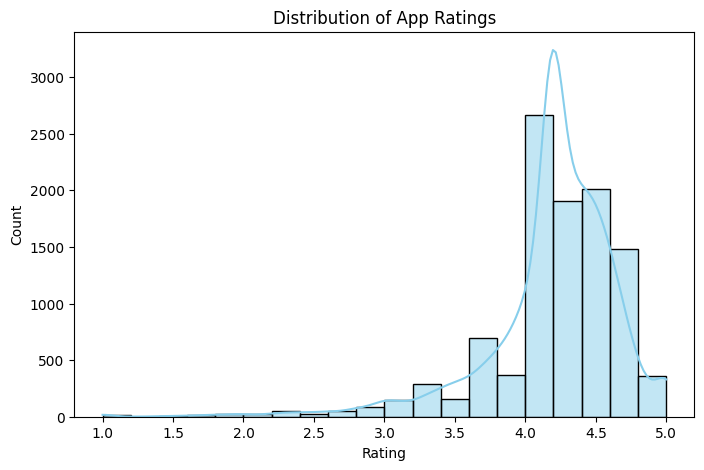

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of App Ratings")
plt.show()


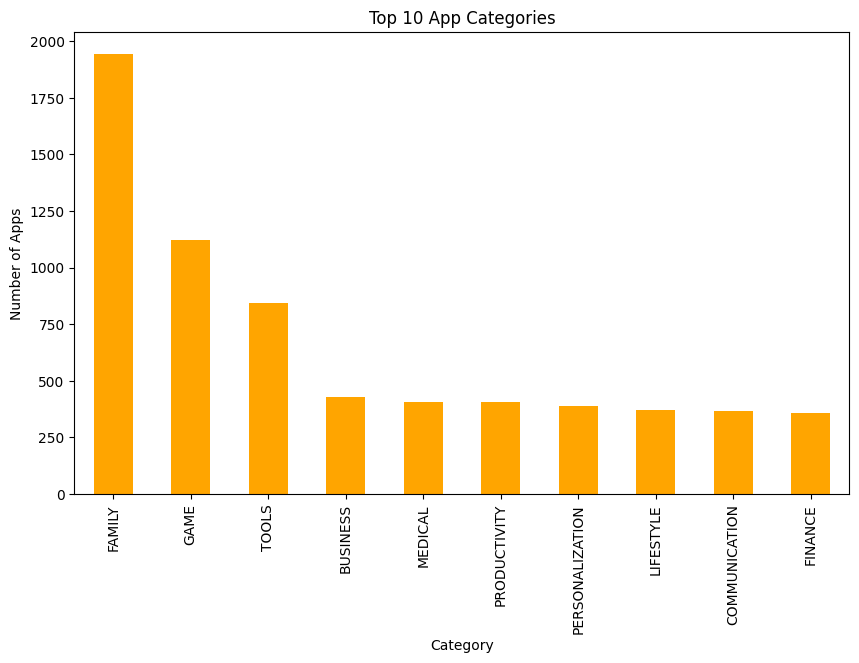

In [35]:
plt.figure(figsize=(10,6))
df['Category'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 App Categories")
plt.ylabel("Number of Apps")
plt.show()


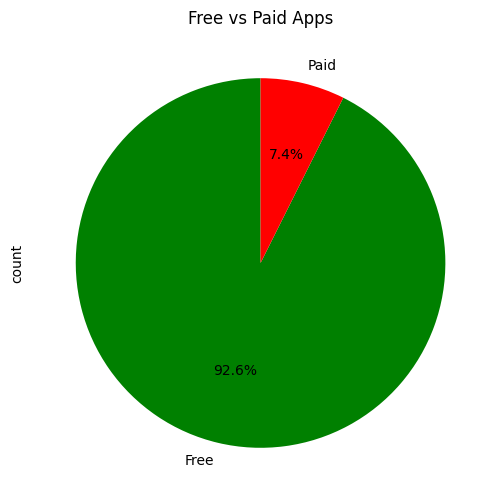

In [36]:
plt.figure(figsize=(6,6))
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green','red'])
plt.title("Free vs Paid Apps")
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_16732\1154440154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Installs', y='App', data=top10_apps, palette="viridis")


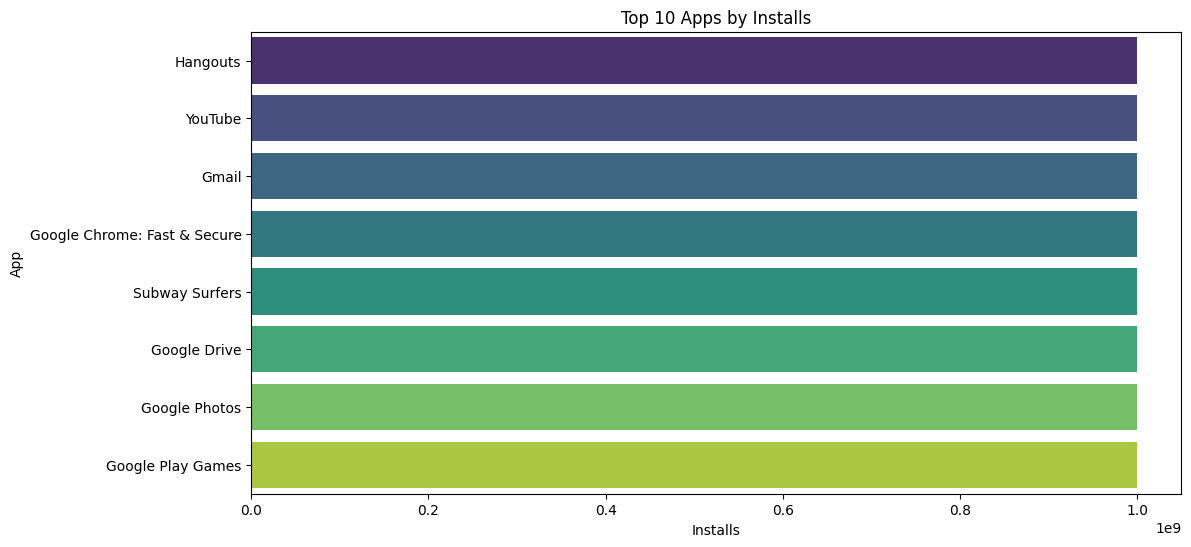

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x='Installs', y='App', data=top10_apps, palette="viridis")
plt.title("Top 10 Apps by Installs")
plt.show()


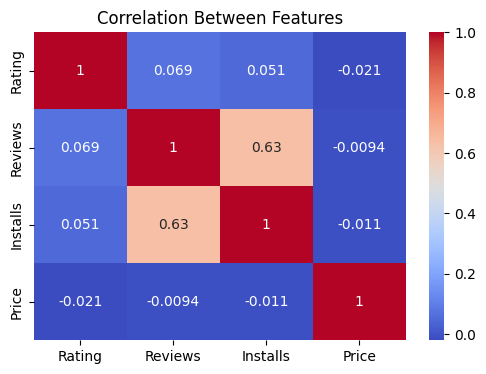

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()


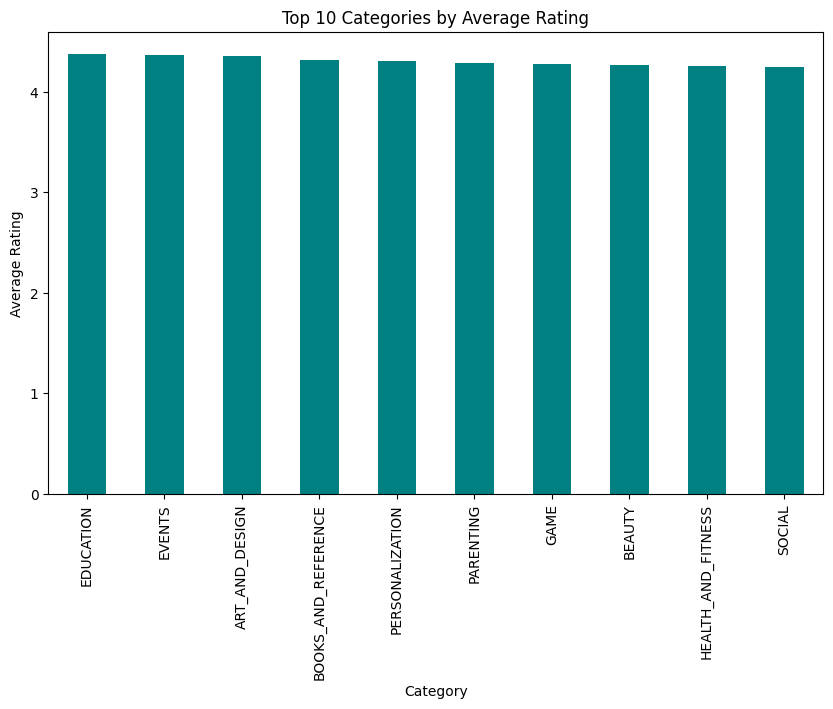

In [41]:
# 7. Average Rating per Category
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
avg_rating.plot(kind='bar', color="teal")
plt.title("Top 10 Categories by Average Rating")
plt.ylabel("Average Rating")
plt.show()

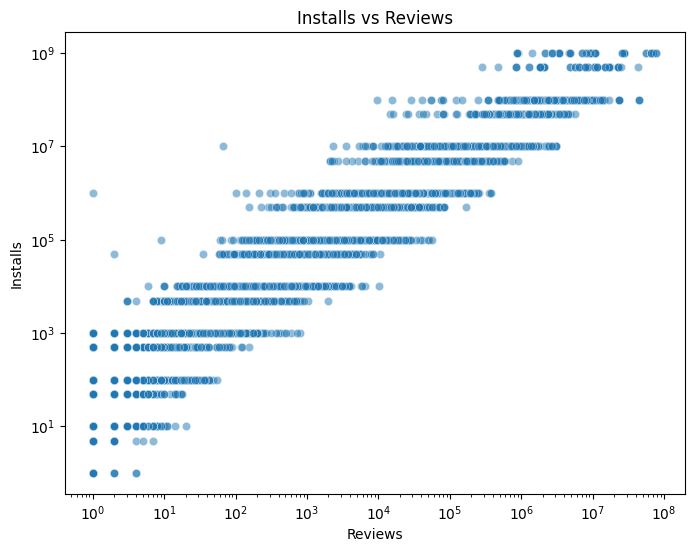

In [40]:
# 6. Installs vs Reviews (Scatter Plot)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Reviews', y='Installs', data=df, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Installs vs Reviews")
plt.show()

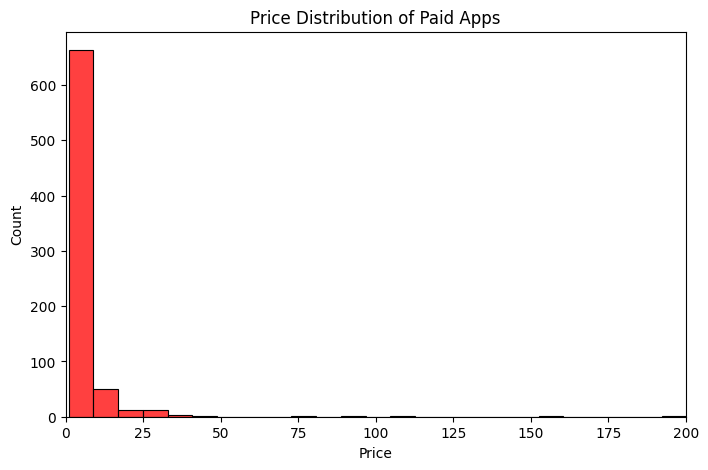

In [42]:
# 8. Price Distribution of Paid Apps
paid_apps = df[df['Type']=='Paid']
plt.figure(figsize=(8,5))
sns.histplot(paid_apps['Price'], bins=50, color="red")
plt.xlim(0,200)  # zoom to most common range
plt.title("Price Distribution of Paid Apps")
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_16732\1973673052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Content Rating', data=df, palette="pastel", order=df['Content Rating'].value_counts().index)


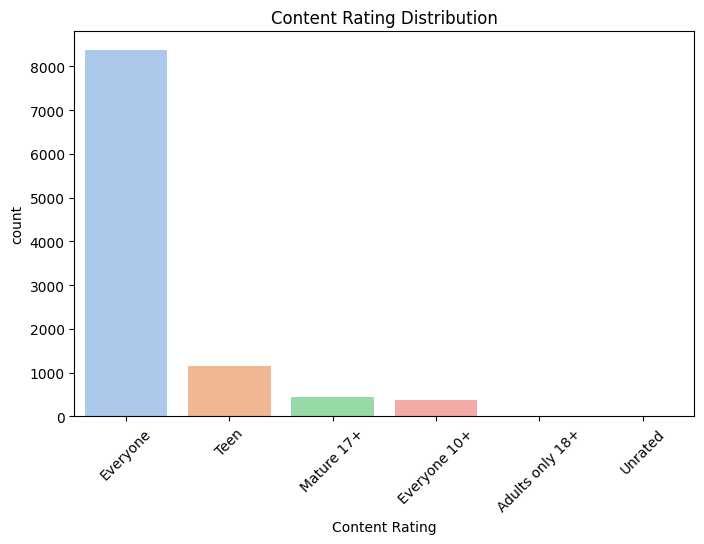

In [43]:
# 9. Content Rating Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Content Rating', data=df, palette="pastel", order=df['Content Rating'].value_counts().index)
plt.title("Content Rating Distribution")
plt.xticks(rotation=45)
plt.show()

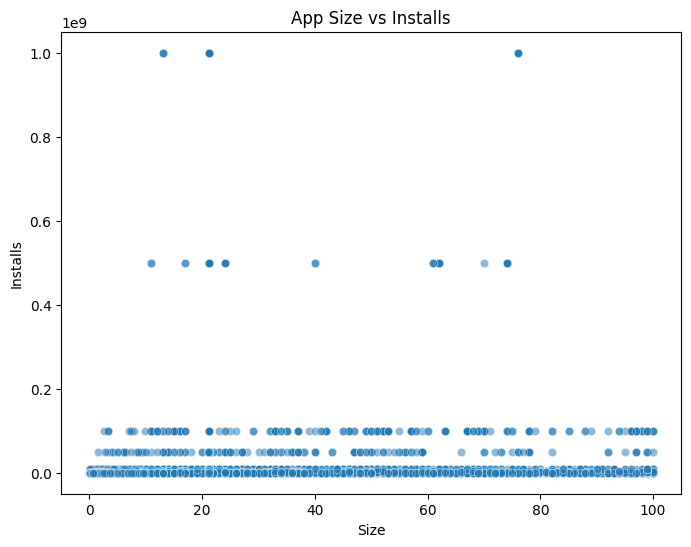

In [44]:
# 10. Size vs Installs
plt.figure(figsize=(8,6))
sns.scatterplot(x='Size', y='Installs', data=df, alpha=0.5)
plt.title("App Size vs Installs")
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_16732\3510926972.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=df[df['Category'].isin(top_categories)], palette="Set2")


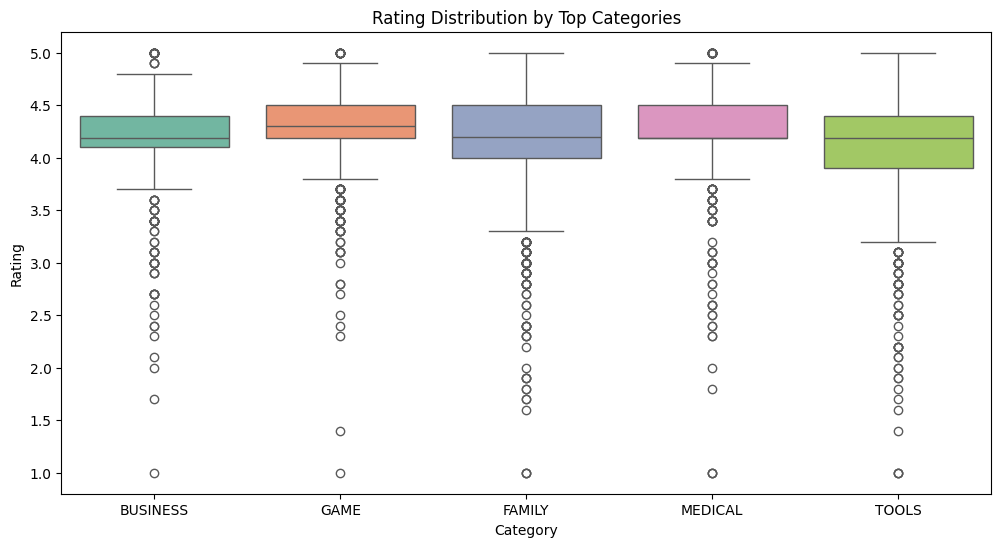

In [46]:
# 12. Boxplot of Ratings by Category
plt.figure(figsize=(12,6))
top_categories = df['Category'].value_counts().nlargest(5).index
sns.boxplot(x='Category', y='Rating', data=df[df['Category'].isin(top_categories)], palette="Set2")
plt.title("Rating Distribution by Top Categories")
plt.show()

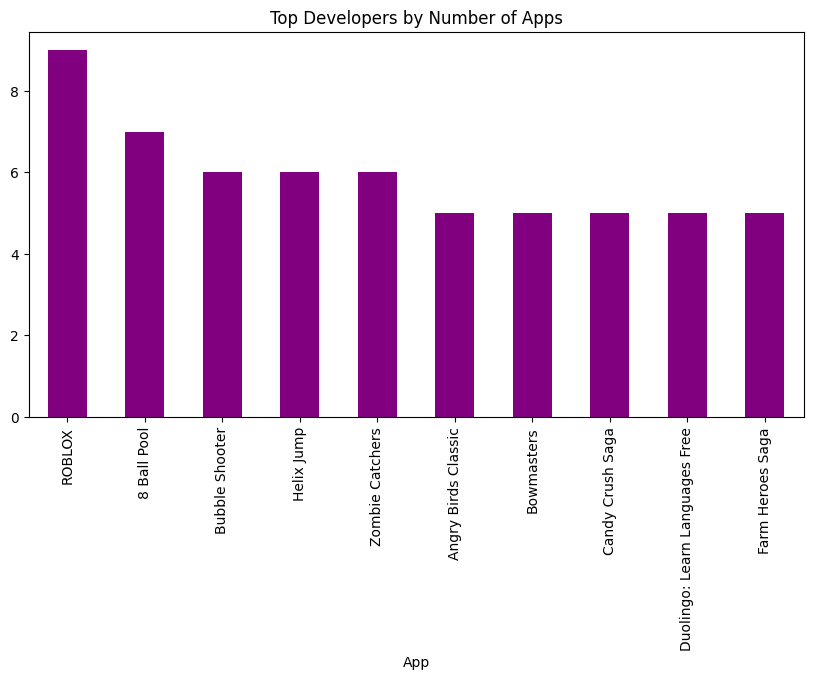

In [47]:

# 13. Top Developers by Number of Apps
plt.figure(figsize=(10,5))
df['App'].groupby(df['App']).count().nlargest(10).plot(kind='bar', color="purple")
plt.title("Top Developers by Number of Apps")
plt.show()

Top 10 Revenue Generating Apps:
                                App     Category   Price  Installs     Revenue
2241                      Minecraft       FAMILY    6.99  10000000  69900000.0
4347                      Minecraft       FAMILY    6.99  10000000  69900000.0
5351                      I am rich    LIFESTYLE  399.99    100000  39999000.0
5356              I Am Rich Premium      FINANCE  399.99     50000  19999500.0
4034                  Hitman Sniper         GAME    0.99  10000000   9900000.0
7417  Grand Theft Auto: San Andreas         GAME    6.99   1000000   6990000.0
2883            Facetune - For Free  PHOTOGRAPHY    5.99   1000000   5990000.0
5578        Sleep as Android Unlock    LIFESTYLE    5.99   1000000   5990000.0
8804            DraStic DS Emulator         GAME    4.99   1000000   4990000.0
4367       I'm Rich - Trump Edition    LIFESTYLE  400.00     10000   4000000.0


C:\Users\shrey\AppData\Local\Temp\ipykernel_16732\4046884470.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Revenue", y="App", data=top_revenue_apps, palette="viridis")


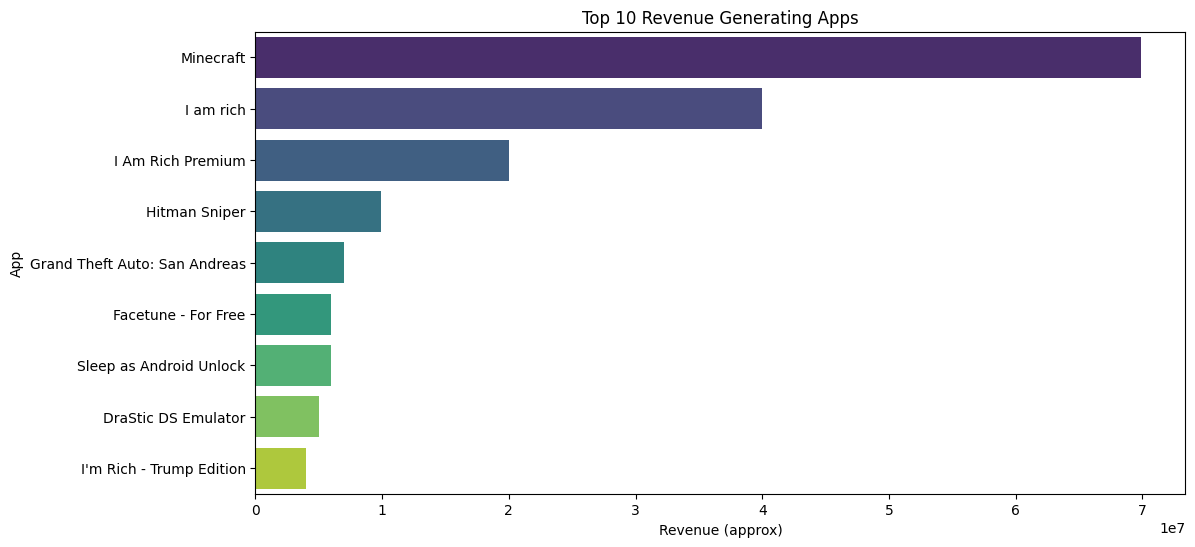

In [48]:
# Ensure Price and Installs are numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Filter only paid apps
paid_apps = df[df['Type'] == 'Paid'].copy()

# Estimate revenue
paid_apps['Revenue'] = paid_apps['Price'] * paid_apps['Installs']

# Top 10 revenue-generating apps
top_revenue_apps = paid_apps[['App', 'Category', 'Price', 'Installs', 'Revenue']].sort_values(
    by="Revenue", ascending=False).head(10)

print("Top 10 Revenue Generating Apps:")
print(top_revenue_apps)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x="Revenue", y="App", data=top_revenue_apps, palette="viridis")
plt.title("Top 10 Revenue Generating Apps")
plt.xlabel("Revenue (approx)")
plt.ylabel("App")
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_16732\3983871509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rating.values, y=category_rating.index, palette="coolwarm")


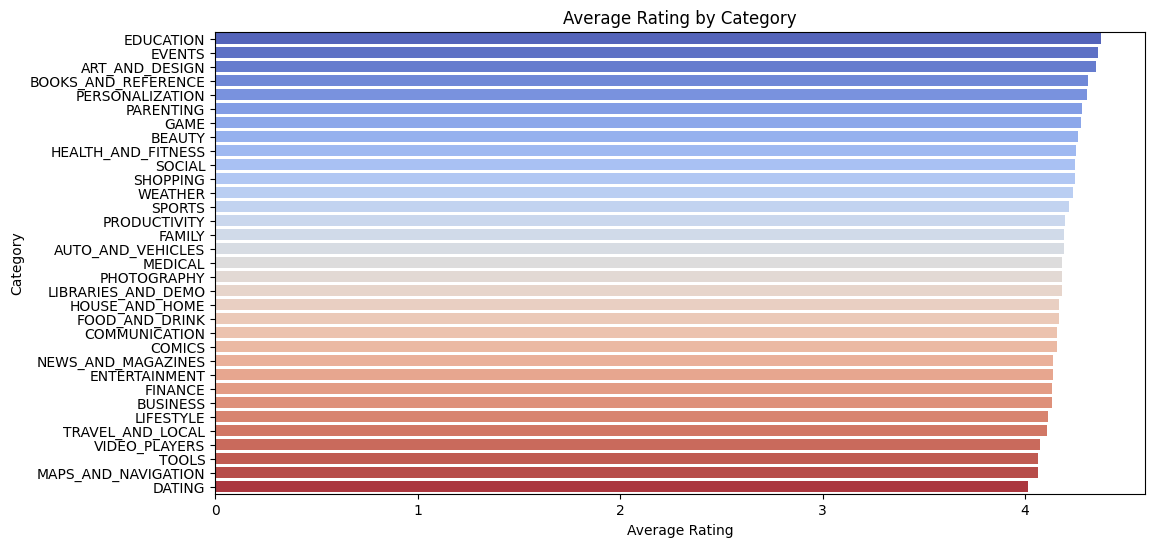

In [49]:
# Average rating per category
category_rating = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=category_rating.values, y=category_rating.index, palette="coolwarm")
plt.title("Average Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()


In [50]:
# Top installed app in each category
top_installs_category = df.loc[df.groupby("Category")["Installs"].idxmax()][["Category", "App", "Installs"]]

print("Most Downloaded App per Category:")
print(top_installs_category)


Most Downloaded App per Category:
                 Category                                                App  \
3          ART_AND_DESIGN                              Sketch - Draw & Paint   
72      AUTO_AND_VEHICLES      Android Auto - Maps, Media, Messaging & Voice   
117                BEAUTY                      Beauty Camera - Selfie Camera   
152   BOOKS_AND_REFERENCE                                  Google Play Books   
194              BUSINESS             OfficeSuite : Free Office + PDF Editor   
297                COMICS                         LINE WEBTOON - Free Comics   
335         COMMUNICATION           Messenger – Text and Video Chat for Free   
482                DATING                     Zoosk Dating App: Meet Singles   
699             EDUCATION                     Duolingo: Learn Languages Free   
865         ENTERTAINMENT                                  Google Play Games   
1005               EVENTS                         Ticketmaster Event Tickets   
5856  

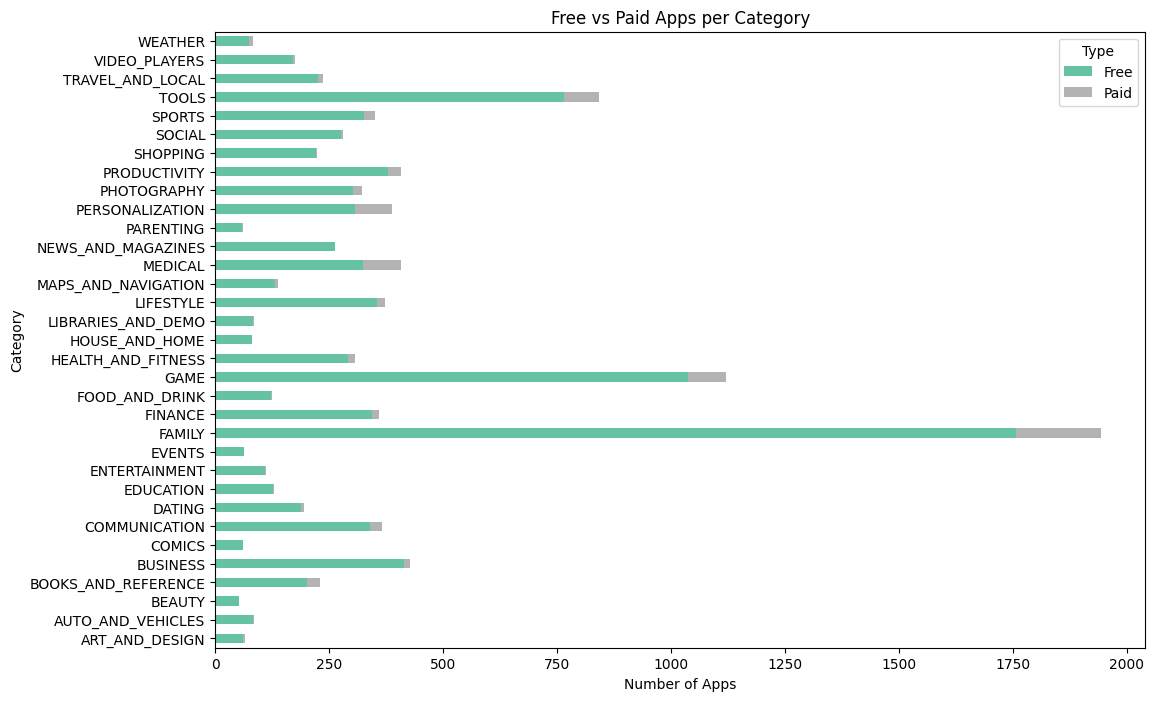

In [51]:
# Free vs Paid distribution by category
category_type = df.groupby(["Category", "Type"]).size().unstack().fillna(0)

category_type.plot(kind="barh", stacked=True, figsize=(12,8), colormap="Set2")
plt.title("Free vs Paid Apps per Category")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()


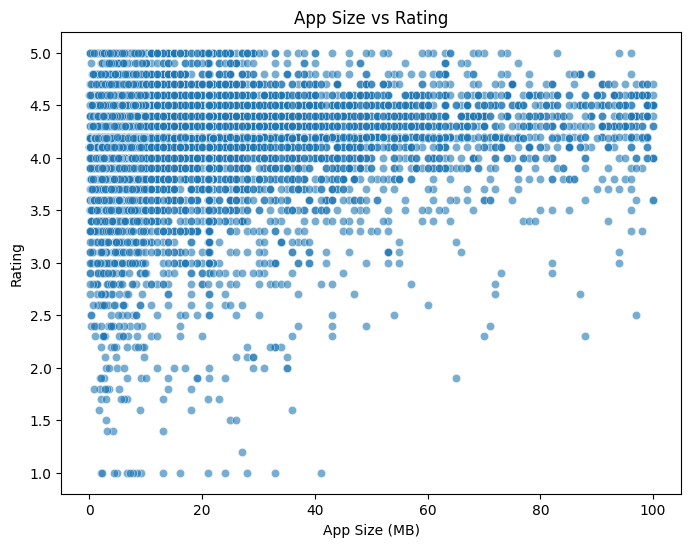

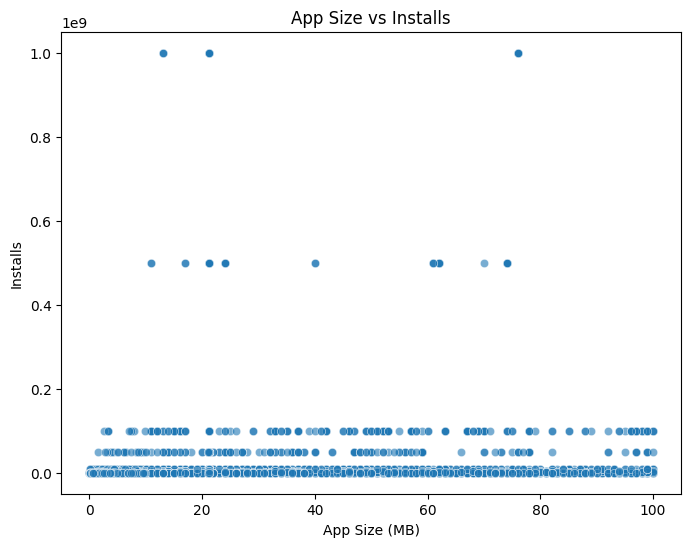

Correlation between Size & Rating: 0.0732400965014137
Correlation between Size & Installs: 0.08269271635649506


In [52]:
# Scatter plot: Size vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x="Size", y="Rating", data=df, alpha=0.6)
plt.title("App Size vs Rating")
plt.xlabel("App Size (MB)")
plt.ylabel("Rating")
plt.show()

# Scatter plot: Size vs Installs
plt.figure(figsize=(8,6))
sns.scatterplot(x="Size", y="Installs", data=df, alpha=0.6)
plt.title("App Size vs Installs")
plt.xlabel("App Size (MB)")
plt.ylabel("Installs")
plt.show()

# Correlation
print("Correlation between Size & Rating:", df["Size"].corr(df["Rating"]))
print("Correlation between Size & Installs:", df["Size"].corr(df["Installs"]))


C:\Users\shrey\AppData\Local\Temp\ipykernel_16732\2162857060.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
C:\Users\shrey\AppData\Local\Temp\ipykernel_16732\2162857060.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_apps.values, y=top_apps.index, palette="mako")


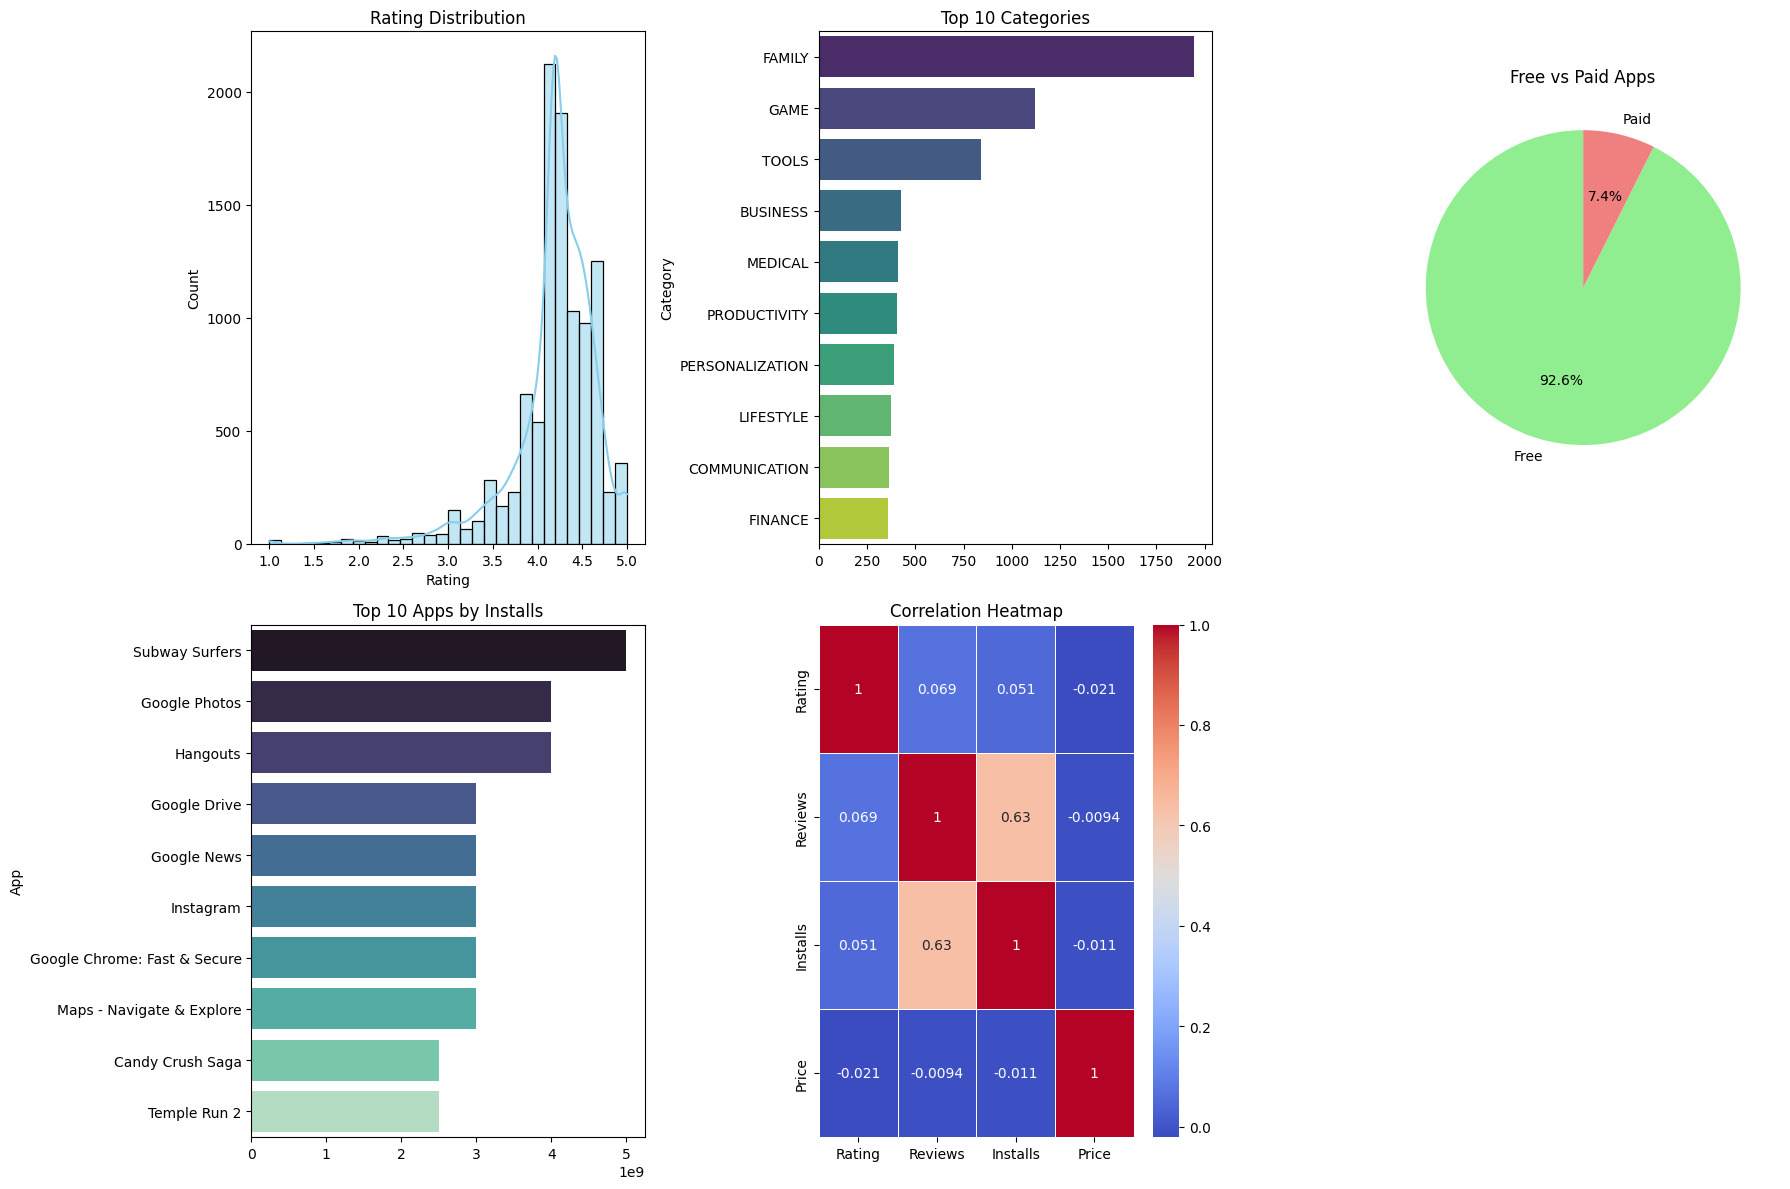

ValueError: Trace type 'pie' is not compatible with subplot type 'xy'
at grid position (1, 3)

See the docstring for the specs argument to plotly.subplots.make_subplots
for more information on subplot types

In [56]:
plt.figure(figsize=(18, 12))

# 1. Rating Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Rating'], bins=30, kde=True, color="skyblue")
plt.title("Rating Distribution")

# 2. Top 10 Categories
plt.subplot(2, 3, 2)
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Categories")

# 3. Free vs Paid Apps
plt.subplot(2, 3, 3)
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["lightgreen", "lightcoral"])
plt.title("Free vs Paid Apps")
plt.ylabel("")

# 4. Top 10 Apps by Installs
plt.subplot(2, 3, 4)
top_apps = df.groupby('App')['Installs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_apps.values, y=top_apps.index, palette="mako")
plt.title("Top 10 Apps by Installs")

# 5. Correlation Heatmap
plt.subplot(2, 3, 5)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()
#👉 This will show all charts together in one dashboard inside your Jupyter Notebook.


import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplot layout
fig = make_subplots(rows=2, cols=3, subplot_titles=(
    "Rating Distribution", 
    "Top 10 Categories", 
    "Free vs Paid Apps", 
    "Top 10 Apps by Installs", 
    "Correlation Heatmap"))

# 1. Rating Distribution
fig.add_trace(go.Histogram(x=df['Rating'], name="Ratings", marker=dict(color="skyblue")), row=1, col=1)

# 2. Top 10 Categories
top_categories = df['Category'].value_counts().head(10)
fig.add_trace(go.Bar(x=top_categories.values, y=top_categories.index, orientation="h", marker=dict(color="green")), row=1, col=2)

# 3. Free vs Paid
type_counts = df['Type'].value_counts()
fig.add_trace(go.Pie(labels=type_counts.index, values=type_counts.values), row=1, col=3)

# 4. Top Apps by Installs
top_apps = df.groupby('App')['Installs'].sum().sort_values(ascending=False).head(10)
fig.add_trace(go.Bar(x=top_apps.values, y=top_apps.index, orientation="h", marker=dict(color="orange")), row=2, col=1)

# 5. Correlation Heatmap
import numpy as np
corr = df.corr(numeric_only=True).round(2)
fig.add_trace(go.Heatmap(z=corr.values, x=corr.columns, y=corr.columns, colorscale="RdBu", zmin=-1, zmax=1), row=2, col=2)

fig.update_layout(height=800, width=1200, showlegend=False, title_text="Google Play Store Apps Dashboard")
fig.show()